## Assignment - ANN
| Name    | Ankush Roy     |
| -------- | -------- |
| Roll no.    | 2151294     |
| Dept.    | CSE (C)- 3rd year     |


### Single Layer Perceptron
---

Iteration 1: In-sample error =  7.2327%, Out-of-sample error = 0.0%
Iteration 2: In-sample error =  6.6038%, Out-of-sample error = 2.5%
Iteration 3: In-sample error =  5.6604%, Out-of-sample error = 0.0%
Iteration 4: In-sample error =  4.7170%, Out-of-sample error = 1.25%
Iteration 5: In-sample error =  4.7170%, Out-of-sample error = 0.0%
Iteration 6: In-sample error =  3.7736%, Out-of-sample error = 1.25%
Iteration 7: In-sample error =  3.1447%, Out-of-sample error = 0.0%
Iteration 8: In-sample error =  1.5723%, Out-of-sample error = 1.25%
Iteration 9: In-sample error =  3.1447%, Out-of-sample error = 2.5%
Iteration 10: In-sample error =  3.1447%, Out-of-sample error = 1.25%
Iteration 11: In-sample error =  2.8302%, Out-of-sample error = 0.0%
Iteration 12: In-sample error =  2.8302%, Out-of-sample error = 1.25%
Iteration 13: In-sample error =  2.5157%, Out-of-sample error = 0.0%
Iteration 14: In-sample error =  2.5157%, Out-of-sample error = 1.25%
Iteration 15: In-sample error =  2.51

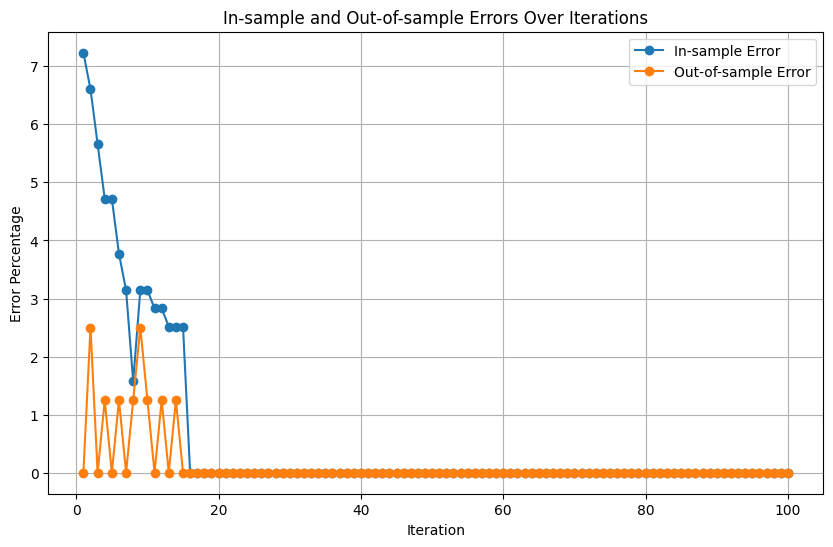

In [17]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Preparing the data
df1 = pd.read_csv('PLA_Data1 - Sheet1.csv')
df2 = pd.read_csv('PLA_Data2 - Sheet1.csv')
data = pd.concat([df1, df2], ignore_index=True)

X = data[['x1', 'x2']].values
y = data['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Initialize parameters
weights = np.zeros(X_train.shape[1])
bias = 0
learning_rate = 0.1
epochs = 100
in_sample_errors = []
out_of_sample_errors = []

# Training the perceptron
for epoch in range(epochs):
    in_sample_error = 0
    out_of_sample_error = 0
    
    # Update weights and bias for each sample in the training set
    for i in range(X_train.shape[0]):
        activation = np.dot(X_train[i], weights) + bias
        
        if activation >= 0:
            prediction = 1
        else:
            prediction = -1
        
        # Update weights and bias if prediction is incorrect
        if prediction != y_train[i]:
            weights += learning_rate * y_train[i] * X_train[i]
            bias += learning_rate * y_train[i]
            in_sample_error += 1
    
    # Calculate out-of-sample error
    for i in range(X_test.shape[0]):
        activation = np.dot(X_test[i], weights) + bias
        
        if activation >= 0:
            prediction = 1
        else:
            prediction = -1
        
        if prediction != y_test[i]:
            out_of_sample_error += 1
    
    # Compute error percentages
    in_sample_error_percentage = in_sample_error / X_train.shape[0] * 100
    out_of_sample_error_percentage = out_of_sample_error / X_test.shape[0] * 100
    
    # Append errors to lists
    in_sample_errors.append(in_sample_error_percentage)
    out_of_sample_errors.append(out_of_sample_error_percentage)
    
    print(f"Iteration {epoch+1}: In-sample error = {in_sample_error_percentage : .4f}%, Out-of-sample error = {out_of_sample_error_percentage}%")


# Final weights and bias
print("Weights:", weights)
print("Bias:", bias)

# Plotting the errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs+1), in_sample_errors, label='In-sample Error', marker='o')
plt.plot(range(1, epochs+1), out_of_sample_errors, label='Out-of-sample Error', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Error Percentage')
plt.title('In-sample and Out-of-sample Errors Over Iterations')
plt.legend()
plt.grid(True)
plt.show()



### Multi Layer Perceptron
---

Iteration 1: In-sample error = 0.4864, Out-of-sample error = 0.4212
Iteration 2: In-sample error = 0.4882, Out-of-sample error = 0.4442
Iteration 3: In-sample error = 0.4908, Out-of-sample error = 0.4772
Iteration 4: In-sample error = 0.4935, Out-of-sample error = 0.4922
Iteration 5: In-sample error = 0.4943, Out-of-sample error = 0.4924
Iteration 6: In-sample error = 0.4937, Out-of-sample error = 0.4906
Iteration 7: In-sample error = 0.4928, Out-of-sample error = 0.4887
Iteration 8: In-sample error = 0.4917, Out-of-sample error = 0.4867
Iteration 9: In-sample error = 0.4905, Out-of-sample error = 0.4845
Iteration 10: In-sample error = 0.4892, Out-of-sample error = 0.4822
Iteration 11: In-sample error = 0.4875, Out-of-sample error = 0.4797
Iteration 12: In-sample error = 0.4855, Out-of-sample error = 0.4769
Iteration 13: In-sample error = 0.4830, Out-of-sample error = 0.4737
Iteration 14: In-sample error = 0.4798, Out-of-sample error = 0.4701
Iteration 15: In-sample error = 0.4755, Out

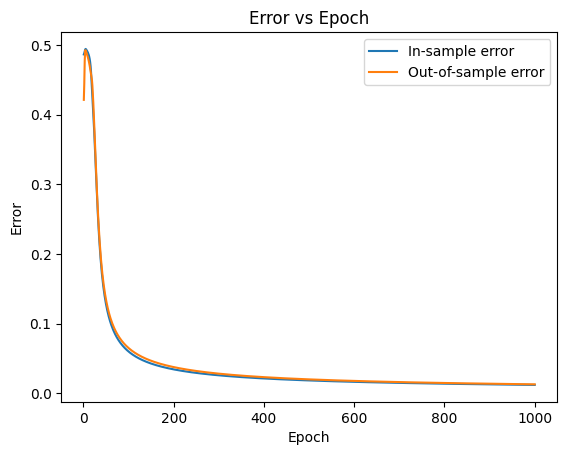

In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(0)
    weights_input_hidden = np.random.rand(input_size, hidden_size)
    weights_hidden_output = np.random.rand(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

def train_mlp(X_train, y_train, X_test, y_test, epochs, learning_rate, hidden_size):
    input_size = X_train.shape[1]
    output_size = 1
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)
    
    in_sample_errors = []
    out_of_sample_errors = []

    for epoch in range(epochs):
        # Forward propagation
        hidden_layer_input = np.dot(X_train, weights_input_hidden)
        hidden_layer_output = sigmoid(hidden_layer_input)
        output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
        predicted_output = sigmoid(output_layer_input)

        # Backpropagation
        error = y_train - predicted_output
        d_predicted_output = error * sigmoid_derivative(predicted_output)
        error_hidden_layer = d_predicted_output.dot(weights_hidden_output.T)
        d_hidden_layer = error_hidden_layer * sigmoid_derivative(hidden_layer_output)

        # Update weights
        weights_hidden_output += hidden_layer_output.T.dot(d_predicted_output) * learning_rate
        weights_input_hidden += X_train.T.dot(d_hidden_layer) * learning_rate

        # Compute errors
        in_sample_error = np.mean(np.abs(error))
        
        hidden_layer_input_test = np.dot(X_test, weights_input_hidden)
        hidden_layer_output_test = sigmoid(hidden_layer_input_test)
        output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output)
        predicted_output_test = sigmoid(output_layer_input_test)
        
        error_test = y_test - predicted_output_test
        out_of_sample_error = np.mean(np.abs(error_test))

        # Store errors for each iteration
        in_sample_errors.append(in_sample_error)
        out_of_sample_errors.append(out_of_sample_error)

        print(f"Iteration {epoch + 1}: In-sample error = {in_sample_error:.4f}, Out-of-sample error = {out_of_sample_error:.4f}")

    return in_sample_errors, out_of_sample_errors

data = pd.read_csv('MLP_Data - Sheet1.csv', header=None)
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Initialise parameters
epochs = 1000
learning_rate = 0.1
hidden_size = 4

# Train the MLP
in_sample_errors, out_of_sample_errors = train_mlp(X_train, y_train, X_test, y_test, epochs, learning_rate, hidden_size)

# Plot errors after completion of training and testing
plt.plot(range(1, epochs + 1), in_sample_errors, label='In-sample error')
plt.plot(range(1, epochs + 1), out_of_sample_errors, label='Out-of-sample error')
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.title('Error vs Epoch')
plt.legend()
plt.show()
